In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import jax
from pathlib import Path
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
import re

def extract_number(string):
    # Use regular expression to find a number inside parentheses
    match = re.search(r'\((\d+)\s+replicas\)', string)
    if match:
        return int(match.group(1))  # Return the number as an integer
    else:
        return None  # Return None if no match is found

In [3]:
def plot_experiments(experiment_folders):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_xlabel('Iteration (adjusted)')  # Change this as appropriate
    ax.set_ylabel('Objective')
    ax.set_title('Objective with error bars (std)')
    
    for experiment_folder in experiment_folders:
        
        directory = Path(f'{experiment_folder}')
        results = {}
        for folder in directory.iterdir():
            if folder.is_dir():
                experiment_name = str(folder)[len(experiment_folder)+1:]
                if experiment_name[0] != '.':
                    with open(f'{experiment_folder}/{experiment_name}/results.pkl', 'rb') as file:
                        results[experiment_name] = pickle.load(file)
        result_dfs = []
    
        for exp in results:
            df = pd.DataFrame({'mean_objective': np.mean(results[exp]['trajectory'],axis=1),
                               'std_objective': np.std(results[exp]['trajectory'],axis=1),
                               'experiment': f'{experiment_folder}: {exp}',
                               'running time': results[exp]['running_time']})
            result_dfs.append(df)
        
        df = pd.concat(result_dfs)

        mean_df = df.pivot(values='mean_objective',columns='experiment')
        std_df = df.pivot(values='std_objective',columns='experiment')
        
        # Loop through each column and plot the mean with the shaded area
        for column in mean_df.columns:
            number = extract_number(column) if extract_number(column) else 1
            scaling = number*10
            ax.plot(mean_df.index*scaling, mean_df[column], label=column)
            ax.fill_between(mean_df.index*scaling, 
                            mean_df[column] - std_df[column], 
                            mean_df[column] + std_df[column], 
                            alpha=0.3)  # alpha for transparency
        
    # Adding labels, title, and legend
    ax.set_xlim(0,5000)
    #ax.set_ylim(0,50)
    ax.grid()
    ax.legend()

    plt.show()
    #fig.savefig(experiment_folder+'/plot.png')

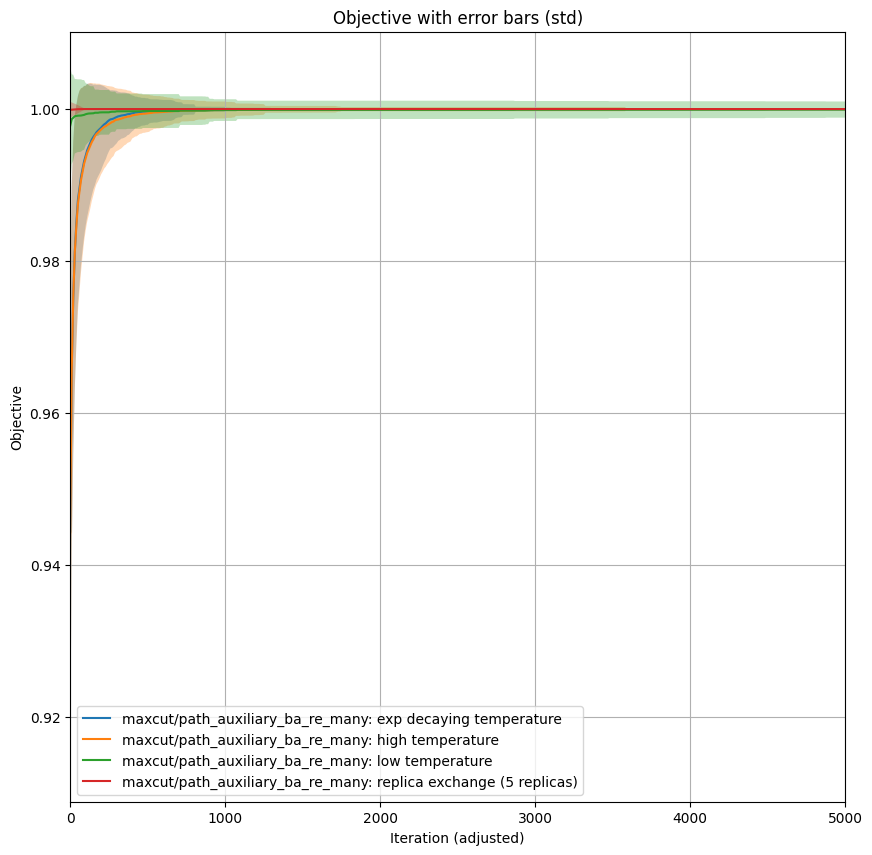

In [5]:
experiment_folders = ['maxcut/path_auxiliary_ba_re_many']
#experiment_folders = ['maxcut/dmala_ba_lowhigh','maxcut/dlmc_ba_lowhigh']
plot_experiments(experiment_folders)

In [22]:
experiment_name = 'low_temp'

In [23]:
with open(f'{experiment_folder}/{experiment_name}/results.pkl', 'rb') as file:
    # Load the object from the file
    results = pickle.load(file)

In [24]:
trajectory = results['trajectory']

In [25]:
df = pd.DataFrame(trajectory)

In [26]:
df.shape

(100, 1000)

<Axes: >

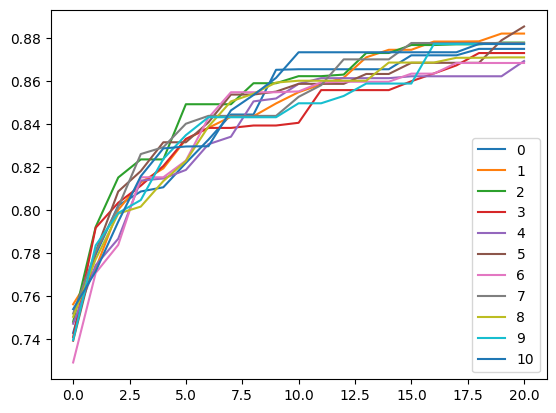

In [27]:
df.loc[:20,0:10].plot()

In [59]:
results['trajectory'][-1,:]

array([30.99    , 30.996   , 31.993   , 31.994001, 30.991   , 30.993002,
       28.992   , 28.993   , 25.99    , 29.994999, 30.994   , 34.998   ,
       30.994   , 29.99    , 30.994001, 29.993   , 32.992   , 34.995   ,
       32.994   , 32.995   , 30.994001, 33.997   , 28.990002, 32.995   ,
       29.993   , 30.997   , 30.994   , 30.993002, 31.992   , 28.990002,
       33.994   , 32.993   , 31.994001, 30.994   , 27.99    , 31.994999,
       29.993   , 29.993   , 33.993   , 29.993   , 32.996   , 31.993   ,
       31.994001, 27.988998, 31.992   , 31.996002, 27.988998, 29.99    ,
       31.992   , 31.994999, 32.993   , 30.992   , 30.991999, 30.994999,
       34.995   , 32.994   , 30.992   , 32.994003, 33.994   , 32.993   ,
       31.993   , 34.999   , 29.994   , 29.994999, 32.996   , 31.994999,
       29.994   , 31.993   , 30.996   , 28.992   , 31.994   , 31.994001,
       30.988   , 31.993   , 34.993   , 31.992   , 31.992   , 31.992   ,
       32.993   , 32.995   , 29.993   , 31.996   , 

In [213]:
results['best_ratio']

array([   43.000004, -7706.0293  , -7154.468   ,    41.000004,
       -8459.797   ,    42.000004,    43.000004, -8446.784   ,
       -7128.441   , -8831.175   ,    42.000004, -8228.56    ,
       -9188.54    , -8380.714   , -7470.7847  ,    43.000004,
       -9629.985   , -8848.191   , -8084.412   , -9503.86    ,
          43.000004,    42.000004, -8552.89    , -9284.637   ,
       -7037.3447  , -8899.241   , -8798.138   , -7391.706   ,
       -6945.255   , -8039.37    , -9304.657   , -8312.648   ,
          42.000004, -7159.4707  ,    41.000004, -9837.199   ,
       -9323.676   , -8384.721   , -9232.581   , -7719.042   ,
          42.000004, -9149.495   ,    42.000004, -9276.629   ,
       -9636.991   , -7087.398   ,    43.000004, -7072.379   ,
       -7522.841   , -9141.488   , -8110.44    ,    42.000004,
       -9303.656   , -9444.797   ,    42.000004, -9237.589   ,
       -8047.3726  ,    42.000004, -8238.57    ,    43.000004,
          42.000004, -8675.017   , -8147.477   , -8218.

In [72]:
np.exp(-1/.4)

0.0820849986238988

In [88]:
experiment_name = 'bernoulli_hightemp'

with open(f'{experiment_name}/samples.pkl', 'rb') as file:
    # Load the object from the file
    samples = pickle.load(file)['trajectory']

with open(f'{experiment_name}/params.pkl', 'rb') as file:
    # Load the object from the file
    params = pickle.load(file)['params']

In [89]:
samples.shape

(10000, 4, 10)

In [90]:
1/(1+np.exp(params))

array([0.48286   , 0.5026763 , 0.54163533, 0.39785805, 0.3373209 ,
       0.5768507 , 0.487088  , 0.41803205, 0.39282462, 0.6176615 ],
      dtype=float32)

In [91]:
samples = np.array(samples)

In [92]:
samples[1000:,2,0].mean()

0.12566666666666668

In [69]:
samples[:,1,0].mean()

Array(0.2819, dtype=float32)

In [94]:
rng = jax.random.PRNGKey(0)

In [97]:
keys = jax.random.split(rng,5)

In [100]:
jax.vmap(jax.random.normal)(keys)

Array([-0.9204866 , -0.738873  ,  1.6133053 , -1.5701252 , -0.55517924],      dtype=float32)

In [ ]:
import importlib
from absl import app
from absl import flags
from discs.common import configs as common_configs
from discs.common import utils
import discs.common.experiment_saver as saver_mod
from ml_collections import config_flags

In [146]:
# CONFIG
model_name = 'mis'
experiment_name = 'exponential'
sampler_name = 'randomwalk'
graph_type = 'ertest'

experiment_config = importlib.import_module(
        f'discs.experiment.configs.{model_name}.{graph_type}'
    )
experiment_config = experiment_config.get_config()

model_config = importlib.import_module(
        f'discs.models.configs.{model_name}_config'
    )

model_config = model_config.get_config()

sampler_config = importlib.import_module(
        f'discs.samplers.configs.{sampler_name}_config'
    )

sampler_config = sampler_config.get_config()

In [147]:
def get_main_config():
  """Merge experiment, model and sampler config."""
  config = common_configs.get_config()
  if (
      'graph_type' not in model_config
      and 'bert_model' not in model_config
  ):
    config.update(experiment_config)
  config.sampler.update(sampler_config)
  config.model.update(model_config)
  if config.model.get('graph_type', None):
    graph_config = importlib.import_module(
        'discs.models.configs.%s.%s'
        % (config.model['name'], config.model['graph_type'])
    )
    config.model.update(graph_config.get_model_config(config.model['cfg_str']))
    co_exp_default_config = importlib.import_module(
        'discs.experiment.configs.co_experiment'
    )
    config.experiment.update(co_exp_default_config.get_co_default_config())
    config.update(experiment_config)
    config.experiment.num_models = config.model.num_models

  if config.model.get('bert_model', None):
    config.update(experiment_config)

  return config

In [150]:
config = get_main_config()

In [153]:
config.get('samplser',0)

0

In [158]:
config.update({'experiment':{'test':'jup'}})

In [159]:
config

experiment:
  batch_size: 32
  chain_length: 50000
  co_opt_prob: true
  decay_rate: 0.01
  ess_ratio: 0.5
  evaluator: co_eval
  fig_folder: ''
  final_temperature: 0.0001
  get_additional_metrics: false
  get_estimation_error: false
  init_temperature: 1
  log_every_steps: 100
  name: CO_Experiment
  num_models: 128
  plot_every_steps: 10
  run_parallel: true
  save_every_steps: 100
  save_root: ''
  save_samples: false
  shuffle_buffer_size: 0
  t_schedule: exp_decay
  test: jup
  use_tqdm: false
  window_size: 10
  window_stride: 10
experiment_name: test
model:
  cfg_str: r-800
  data_root: ./sco/
  graph_type: ertest
  max_num_edges: 47885
  max_num_nodes: 800
  name: mis
  num_categories: 2
  num_instances: 128
  num_models: 128
  penalty: 1.001
  rand_type: '800'
  save_dir_name: mis
  shape: !!python/tuple
  - 0
sampler:
  adaptive: true
  name: randomwalk
  target_acceptance_rate: 0.237

In [160]:
experiments = [{'experiment_name': 'exp_temp_decay',
                'experiment': {'t_schedule': 'exp_decay'}},
                {'experiment_name': 'high_temp',
                'experiment': {'t_schedule': 'constant',
                               'init_temperature': 1}},
                {'experiment_name': 'high_temp',
                'experiment': {'t_schedule': 'constant',
                               'init_temperature': 0.01}}]

In [167]:
experiment ={'experiment_name': 'high_temp',
                'experiment': {'t_schedule': 'constant',
                               'init_temperature': 1}}

In [168]:
config.update(experiment)

In [164]:
config

experiment:
  batch_size: 32
  chain_length: 50000
  co_opt_prob: true
  decay_rate: 0.01
  ess_ratio: 0.5
  evaluator: co_eval
  fig_folder: ''
  final_temperature: 0.0001
  get_additional_metrics: false
  get_estimation_error: false
  init_temperature: 1
  log_every_steps: 100
  name: CO_Experiment
  num_models: 128
  plot_every_steps: 10
  run_parallel: true
  save_every_steps: 100
  save_root: ''
  save_samples: false
  shuffle_buffer_size: 0
  t_schedule: exp_decay
  test: jup
  use_tqdm: false
  window_size: 10
  window_stride: 10
experiment_name: exp_temp_decay
model:
  cfg_str: r-800
  data_root: ./sco/
  graph_type: ertest
  max_num_edges: 47885
  max_num_nodes: 800
  name: mis
  num_categories: 2
  num_instances: 128
  num_models: 128
  penalty: 1.001
  rand_type: '800'
  save_dir_name: mis
  shape: !!python/tuple
  - 0
sampler:
  adaptive: true
  name: randomwalk
  target_acceptance_rate: 0.237

In [76]:
def get_xi(x,i):
    return x[i]

In [77]:
func = jax.vmap(first_comp)

In [78]:
array = jax.numpy.arange(20).reshape([5,4])

In [80]:
array

Array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]], dtype=int32)

In [82]:
get_xi(array,jax.numpy.array([0,0,0,0]))

Array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]], dtype=int32)